Z^2 as function of w^2 = 0.000100189970 * x + 666.369411374065
L = 0.010009494010027372 +- 0.0008121372887792263 [H]
R =  25.81413200892226 +- 3.027813090281344 [Ohm]


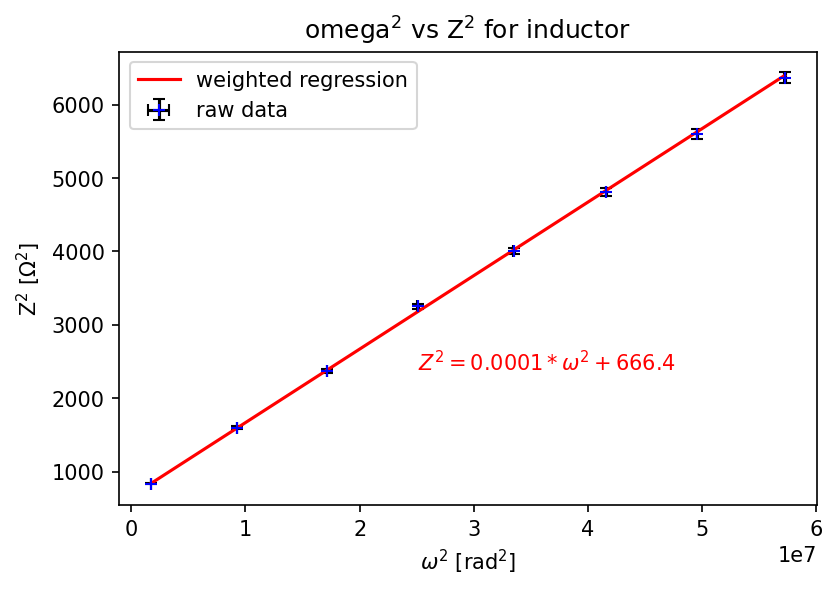

In [155]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

freq1 = np.array([209, 485, 659, 797, 921, 1026, 1120, 1204])
I1 = np.array([93.3, 87.4, 84.4, 80.5, 76.9, 73.9, 71.3, 69.0])/1000
V1 = np.array([2.699, 3.496, 4.114, 4.592, 4.867, 5.124, 5.336, 5.505])

I1_error = I1*(0.75/100)+(0.2/1000)
V1_error = V1*(0.5/100)+0.002

freq1_error = 0.5

omega1_2 = (freq1*2*np.pi)**2 
Z1_2 = (V1/I1)**2

omega1_error = omega1_2*(freq1_error/freq1) 
Z1_error = Z1_2*np.sqrt((V1_error / V1)**2 + (I1_error / I1)**2)

#plt.plot(omega1_2, Z1_2, '.')

def func(x, m, b):
    return m*x + b

popt, pcov = curve_fit(func, omega1_2, Z1_2, sigma=Z1_error, absolute_sigma=True)
a, b = popt 
fehler = np.sqrt(np.diag(pcov)) # errors are the diagonal elements of the co-variance matrix, and the standard error is its square root

print('Z^2 as function of w^2 = %.12f * x + %.12f' % (a, b))
L = np.sqrt(a)
print("L =", L, "+-", np.sqrt(fehler[0]), "[H]")
Rl = np.sqrt(b)
print("R = ", Rl, "+-", np.sqrt(fehler[1]), "[Ohm]")
plt.errorbar(omega1_2, Z1_2, yerr=Z1_error, xerr=omega1_error, fmt='b+', ecolor='k',capsize=3, label="raw data")
plt.plot(omega1_2, func(omega1_2, *popt), 'r', label= "weighted regression"); plt.ylabel('Z$^2$ [$\Omega^2$]'); plt.xlabel('$\omega^2$ [rad$^2$]'); plt.title("omega$^2$ vs Z$^2$ for inductor")
plt.text(omega1_2[3], Z1_2[2], f"$Z^2={round(a, 6)}*\omega^2 +{round(b, 1)}$", color='r')
plt.legend()
plt.show()



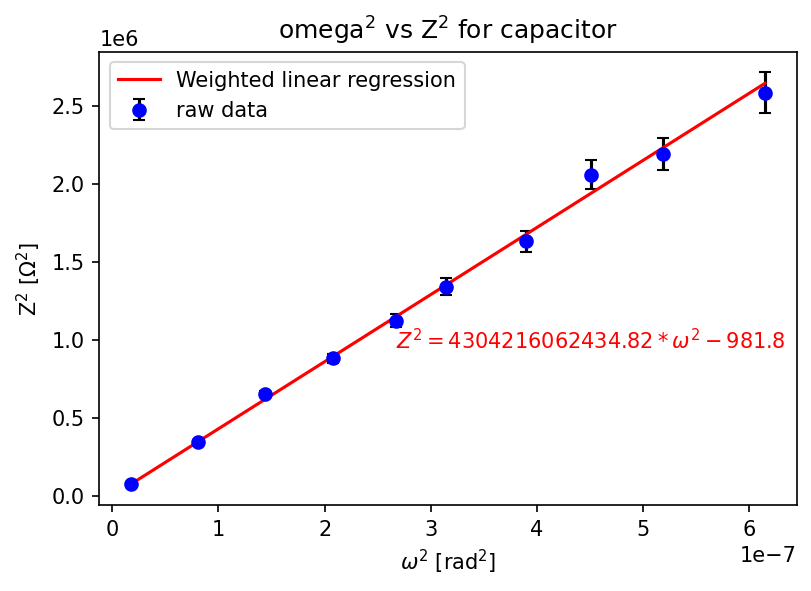

The slope of the line is 4304216062434.82 +/- 56680621054.68

The intercept of the line is -981.8 +/- 1635.5
C =  4.820065812449136e-07 +- 6.347365462399937e-09 [F]


In [154]:
freq2 = np.array([203, 221, 237, 255, 284, 308, 349, 420, 560, 1200])
I2 = np.array([4.7, 5.1, 5.4, 5.9, 6.5, 7.1, 8.0, 9.7, 12.9, 27.2])/1000
V2 = np.array([7.555, 7.551, 7.746, 7.538, 7.528, 7.521, 7.506, 7.843, 7.555, 7.435])

I2_error = I2*(0.75/100)+(0.2/1000)
V2_error = V2*(0.5/100)+0.002

freq2_error = 0.5

omega2_neg2 = np.power(freq2*2*np.pi, -2) 

Z2_2 = (V2/I2)**2

omega2_error = omega2_2*(freq2_error/freq2) 
Z2_error = Z2_2*np.sqrt((V2_error / V2)**2 + (I2_error / I2)**2)

#plt.plot(omega2_2, Z2_2, '.')
# not using curve_fit here because of a weird "OptimizeWarning: Covariance of the parameters could not be estimated" error
# and I gave up on trying to fix it
# also I am neglecting error in x here
def weighted(x, y, dx, dy):
    N = len(x)
    w = 1/dy**2
    Delta = sum(w)*sum(w*x**2)-(sum(w*x))**2
    A = (sum(w*x**2)*sum(w*y)-sum(w*x)*sum(w*x*y))/Delta
    B = (sum(w)*sum(w*x*y)-sum(w*x)*sum(w*y))/Delta

    #Plot the points with error bars
    plt.errorbar(x, y, yerr=dy, fmt='bo', ecolor='k', capsize=3, label="raw data")

    #Plot the stright line fit
    plt.plot(x, A+B*x, 'r', label="Weighted linear regression")

    #Add the titles, labels, and legend
    plt.legend()
    plt.title("omega$^2$ vs Z$^2$ for capacitor")
    plt.xlabel("$\omega^2$ [rad$^2$]", fontsize=10)
    plt.ylabel("Z$^2$ [$\Omega^2$]", fontsize=10)

    #Add equation of line
    plt.text(x[5], y[4]-400000, f"$Z^2={round(B, 2)}*\omega^2{round(A, 1)}$", color='r')
    plt.show()

    #Define sigma_A, and sigma_B according to the above equations 18 and 19
    sigma_A = np.sqrt(sum(w*x**2)/Delta) #equation 18
    sigma_B = np.sqrt(sum(w)/Delta) #equation 19

    #Print the values
    print('The slope of the line is', round(B, 2), '+/-', round(sigma_B, 2)) # slope is 1/C^2
    print()
    print('The intercept of the line is', round(A, 1), '+/-', round(sigma_A, 1)) # intercept is through 0 within error
    print("C = ", 1/np.sqrt(B), "+-",(sigma_B/B)*(1/np.sqrt(B)), "[F]")
    return {"C": 1/np.sqrt(B), "Rc": np.sqrt(abs(A))}
cap = weighted(omega2_neg2, Z2_2, omega2_error, Z2_error)

The slope of the line is 107.78 +/- 0.58

The intercept of the line is 0.0204 +/- 0.0196


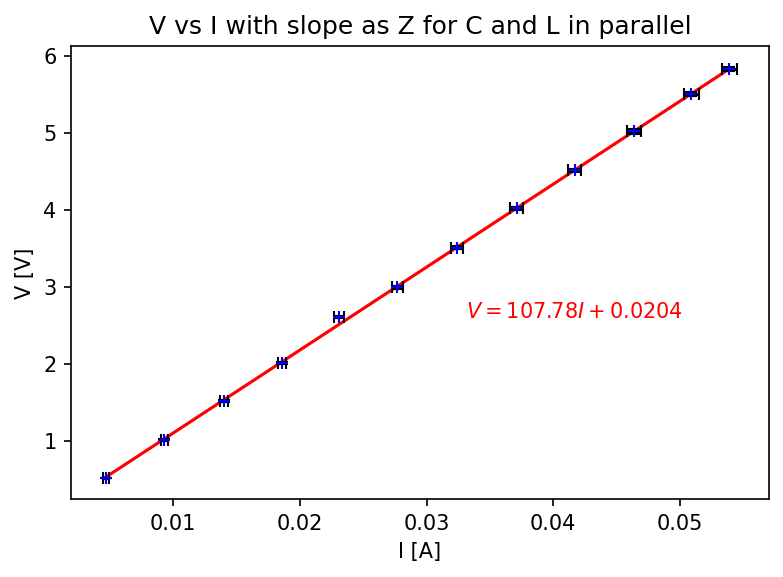

In [148]:
Capacitance = 0.478/1e6 # in micro Farad converted to Farad (measured value)
Capacitance_error = Capacitance*(0.5/100) + 0.001/1e6
f3 = 1201 # in Hz

f3_error = 0.5
V3 = np.array([0.5126, 1.0142, 1.5160, 2.0072, 2.604, 2.991, 3.508, 4.016, 4.509, 5.016, 5.503, 5.826])
I3 = np.array([4.7, 9.3, 14.0, 18.6, 23.1, 27.7, 32.4, 37.1, 41.7, 46.4, 50.9, 53.9])/1000
freq3 = np.empty(V3.size)
freq3.fill(f3)
I3_error = I3*(0.75/100)+(0.2/1000)
V3_error = V3*(0.5/100)+0.002

Z3 = V3/I3
def fit(x, y, mode):
    N = len(x)

    #Define Delta according to equation 9
    Delta = N*sum(x**2)-(sum(x))**2

    #Define A and B according to equations 7 and 8
    A = (sum(x**2)*sum(y)-sum(x)*sum(x*y))/Delta
    B = (N*sum(x*y)-sum(x)*sum(y))/Delta
    plt.plot(x, A+B*x, 'r', label="Unweighted linear regression")
    plt.text(x[4]+0.01, y[4], f"$V={round(B, 2)}I + {round(A, 4)}$", color='r')
    plt.xlabel("I [A]"); plt.ylabel("V [V]")
    if mode == "Series":
        plt.title("V vs I with slope as Z for C and L in series")
    else:
        plt.title("V vs I with slope as Z for C and L in parallel")
    #Define h_i, sigma_y, sigma_A, and sigma_B according to the above equations 10 through 13
    h_i = y-(A+B*x) #equation 10
    sigma_y = np.sqrt(sum(h_i**2)/(N-2)) #equation 11
    sigma_A = sigma_y*np.sqrt(sum(x**2)/Delta) #equation 12
    sigma_B = sigma_y*np.sqrt(N/Delta) #equation 13

    #Print the values
    print('The slope of the line is', round(B, 2), '+/-', round(sigma_B, 2))
    print()
    print('The intercept of the line is', round(A, 4), '+/-', round(sigma_A, 4))
omega3= (freq3*2*np.pi)

#omega3_error = omega3*(f3_error/f3)
#Z3_error = Z3*np.sqrt((V3_error / V3)**2 + (I3_error / I3)**2)
fit(I3, V3, "Parallel")
plt.errorbar(I3, V3, yerr=V3_error, xerr=I3_error, fmt='b+', ecolor='k',capsize=3)
plt.show()

The slope of the line is 202.46 +/- 0.14

The intercept of the line is 0.0369 +/- 0.003


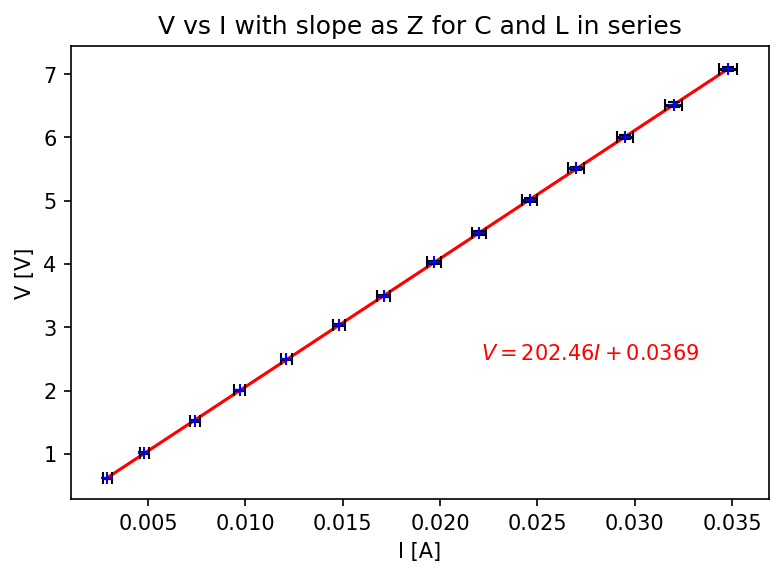

In [149]:
I4 = np.array([2.9, 4.8, 7.4, 9.7, 12.1, 14.8, 17.1, 19.7, 22.0, 24.6, 27.0, 29.5, 32.0, 34.8])/1000
V4 = np.array([0.6172, 1.0157, 1.5258, 2.0048, 2.492, 3.035, 3.499, 4.028, 4.490, 5.011, 5.510, 6.006, 6.517, 7.080])
f4 = 1201 # in Hz
f4_error = 0.5
I4_error = I4*(0.75/100)+(0.2/1000)
V4_error = V4*(0.5/100)+0.002

fit(I4, V4, "Series")
plt.errorbar(I4, V4, yerr=V4_error, xerr=I4_error, fmt='b+', ecolor='k',capsize=3)
plt.show()

In [86]:
w = 2*np.pi*f4
Zl = complex(Rl, w*L)
Zc = complex(0, -1/(w*cap["C"]))
Z_series = Zl + Zc
Z_parallel = 1/(1/Zl + 1/Zc)
print(abs(Z_series), abs(Z_parallel))

201.06258806668833 109.14798077616868


In [99]:
Icp_exp = V3[11]/abs(Zc)
Ilp_exp = V3[11]/abs(Zl)
print("Capacitor current parallel:", Icp_exp, "Inductor current parallel:", Ilp_exp)

Vcs_exp = I4[13]*abs(Zc)
Vls_exp = I4[13]*abs(Zl)
print("Capacitor voltage series:", Vcs_exp, "Inductor voltage series:", Vls_exp)

Capacitor current parallel: 0.021190749816639005 Inductor current parallel: 0.07298736118338274
Capacitor voltage series: 9.567608591216743 Inductor voltage series: 2.777806961545001
